<a href="https://colab.research.google.com/github/vi-sync/From_Scratch/blob/main/MNIST_DUMMY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [41]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Input,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
X_train[1].shape

(28, 28)

In [94]:
X_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [96]:
X_train,X_test = X_train/255,X_test/255

In [97]:
categorical_ytrain = to_categorical(Y_train,10)
categorical_ytest = to_categorical(Y_test,10)

<Figure size 720x360 with 0 Axes>

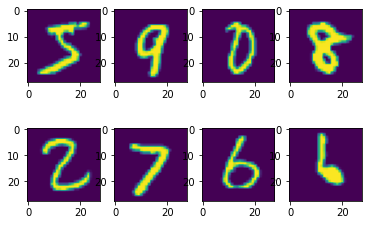

In [98]:
plt.figure(figsize=(10,5))
i=0
j=0
fig , ax = plt.subplots(2,4)
for num in range(0,len(X_train),800):
  if j==4:
    j=0
    i+=1
  if i>1:
    break
  
  
  ax[i][j].imshow(X_train[num])
  j+=1
plt.show()

In [99]:
np.argmax(categorical_ytrain[2])

4

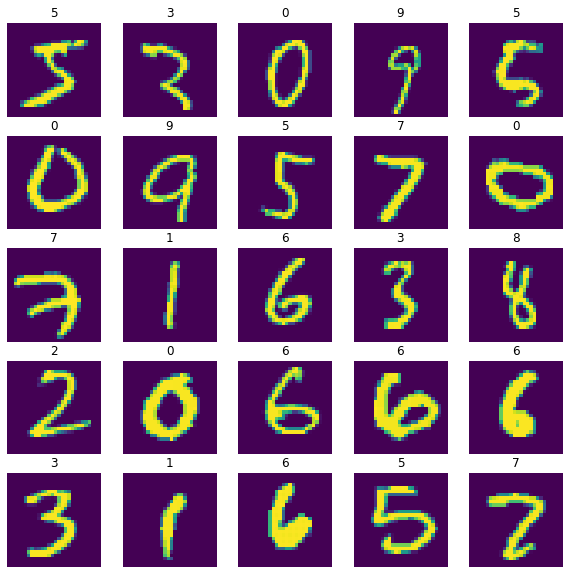

In [100]:
plt.figure(figsize=(10,10))
for idx,i in enumerate(range(0,len(X_train),500)):
  if idx>24:
    break
  
  plt.subplot(5,5,idx+1)
  plt.imshow(X_train[i])
  plt.title(np.argmax(categorical_ytrain[i]))
  plt.axis('off')
plt.show()

In [101]:
tf.keras.backend.clear_session()
input = Input((28,28))
l1  = Flatten()(input)
l1= Dense(128,activation='relu')(l1)
l2 = Dropout(0.5)(l1)
l2 = Dense(64,activation='relu')(l1)
output = Dense(10,activation='sigmoid')(l2)
model = Model(inputs=input, outputs=output)

In [102]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(Adam(0.01),'categorical_crossentropy', 
              metrics=['accuracy'])

In [104]:
model.fit(X_train,categorical_ytrain,batch_size=64,validation_data=(X_test,categorical_ytest),epochs=20)

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.5479 - accuracy: 0.8256 - val_loss: 0.2918 - val_accuracy: 0.9144
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2494 - accuracy: 0.9245 - val_loss: 0.2167 - val_accuracy: 0.9348
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1782 - accuracy: 0.9459 - val_loss: 0.1503 - val_accuracy: 0.9528
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1437 - accuracy: 0.9556 - val_loss: 0.1396 - val_accuracy: 0.9585
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1202 - accuracy: 0.9630 - val_loss: 0.1348 - val_accuracy: 0.9573
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1041 - accuracy: 0.9679 - val_loss: 0.1323 - val_accuracy: 0.9588
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0941 - accuracy: 0.9707 - val_loss: 0.1212 - val_accuracy: 0.9652
Epoch 

In [105]:
preds = model.predict(X_test)

In [106]:
predictions = np.argmax(preds,axis=1)

<Figure size 720x720 with 0 Axes>

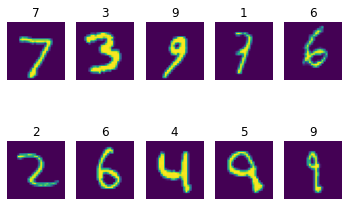

In [107]:
plt.figure(figsize=(10,10))
fig, ax  = plt.subplots(2,5)
i,j = 0,0
for idx,num in enumerate(range(0,len(X_test),500)):
  
  if j==5:
    j=0
    i+=1
  if i==2:
    break

  ax[i][j].imshow(X_test[num])
  ax[i][j].set_title(predictions[num])
  ax[i][j].axis('off')
  j+=1
plt.show()